In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
import scipy
import csv
import pandas as pd
df = pd.read_csv(r"G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220621_All_Data\05_CompiledMonthly\CSV\2022_Feb.csv")
df.dropna(inplace=True) # Drop null values
df.columns = df.columns.map(lambda row: "_".join(row.lower().split(" "))) # Replace space with "_"
df.set_index('id', inplace=True)
df.head()

,spacetype,spacetype_1,area,vol,level,h,orien,nef,aef,lef,...,aefv,aefa,tin,dt,hum,ach,pm25,io,f,q4
id,,,,,,,,,,,,,,,,,,,,,
301_BS_O_O01,Offices,Shared Cellular Offices,24.00,90.00,-1,3.75,5,1,22.50,0.00759,...,0.2500,0.9375,18.59,11.39,0.00545,0.707,13.625,0.665,63.63000,2.828000
301_BS_O_O02,Offices,Shared Cellular Offices,12.00,45.00,-1,3.75,5,1,11.25,0.00380,...,0.2500,0.9375,18.73,11.52,0.00543,0.648,13.621,0.665,29.16000,2.592000
301_BS_O_O03,Offices,Shared Cellular Offices,10.00,37.50,-1,3.75,5,1,9.37,0.00316,...,0.2499,0.9370,18.14,10.93,0.00531,0.610,14.062,0.686,22.87500,2.441302
301_BS_O_O04,Offices,Shared Cellular Offices,16.50,61.88,-1,3.75,5,1,11.25,0.00380,...,0.1818,0.6818,18.34,11.13,0.00533,0.441,13.800,0.673,27.28908,2.425696
301_BS_O_O05,Offices,Shared Cellular Offices,24.75,92.81,-1,3.75,320,2,20.63,0.00696,...,0.2223,0.8336,18.16,10.95,0.00532,0.787,13.918,0.679,73.04147,3.540546


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [3]:
X = df[['orien', 'nef', 'aef', 'aefa', 'lpw', 'q4','ach', 'hum']]
y = pd.Series(df.pm25)
X.head()

,orien,nef,aef,aefa,lpw,q4,ach,hum
id,,,,,,,,
301_BS_O_O01,5,1,22.50,0.9375,0.02775,2.828000,0.707,0.00545
301_BS_O_O02,5,1,11.25,0.9375,0.02063,2.592000,0.648,0.00543
301_BS_O_O03,5,1,9.37,0.9370,0.01969,2.441302,0.610,0.00531
301_BS_O_O04,5,1,11.25,0.6818,0.02625,2.425696,0.441,0.00533
301_BS_O_O05,320,2,20.63,0.8336,0.02719,3.540546,0.787,0.00532


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# xgboost

In [5]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [6]:
xgbr = xgb.XGBRegressor(n_estimators=10, max_depth= 10,colsample_bytree =0.1, colsample_bylevel =0.1,subsample=0.1, random_state=42)
from pprint import pprint

In [7]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgbr.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'colsample_bylevel': 0.1,
 'colsample_bynode': None,
 'colsample_bytree': 0.1,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': 10,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 10,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': 0.1,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [8]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#learning rate 
learning_rate = [0.01, 0.1, 0.2, 0.3]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
colsample_bytree = np.arange(0.4, 1.0, 0.1)
# Minimum number of samples required at each leaf node
colsample_bylevel = np.arange(0.4, 1.0, 0.1)
# Method of selecting samples for training each tree
subsample = np.arange(0.5, 1.0, 0.1)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'colsample_bytree': colsample_bytree,
               'colsample_bylevel': colsample_bylevel,
               'subsample': subsample}
pprint(random_grid)

{'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'learning_rate': [0.01, 0.1, 0.2, 0.3],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])}


On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [9]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgbr = xgb.XGBRegressor(n_estimators=10, max_depth =2,colsample_bytree =0.1, colsample_bylevel =0.1,subsample=0.1, random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgbr_random = RandomizedSearchCV(estimator = xgbr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
xgbr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=0.1,
                                          colsample_bynode=None,
                                          colsample_bytree=0.1,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=2,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsampl

In [10]:
xgbr_random.best_params_


{'subsample': 0.7999999999999999,
 'n_estimators': 800,
 'max_depth': 100,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.4}

Evaluate Random Search
To determine if random search yielded a better model, we compare the base model with the best random search model.

In [12]:
from sklearn.utils import shuffle
X_shuffle, y_shuffle = shuffle(X_train, y_train, random_state=42)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbr, X_shuffle, y_shuffle,
                         scoring="neg_mean_squared_error",
                         cv=10, n_jobs=1)
rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 2))
print("RMSE average: ", np.mean(rmse))

RMSE values:  [1.62 1.56 2.14 1.93 1.68 2.02 2.5  2.23 2.68 2.19]
RMSE average:  2.053911723221832


C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\arp17tka\AppData\Local\Programs\Python\Python3

In [11]:
from sklearn.metrics import mean_squared_error # for calculating the cost function

In [12]:
def evaluate(xgbr, X_train, y_train):
    predictions = xgbr.predict(X_train)
    errors = abs(predictions - y_train)
    mape = 100 * np.mean(errors / y_train)
    rmse = float(format(np.sqrt(mean_squared_error(y_train, predictions)), '.3f'))    
    accuracy = 100 - mape
    print('Model Performance:')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print("\nRMSE: ", rmse)
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = xgb.XGBRegressor(n_estimators=10, max_depth =10,colsample_bytree =0.1, colsample_bylevel =0.1,subsample=0.1, random_state=42)
xgbr_pre = base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)

Model Performance:
Average Error: 1.2753 degrees.

RMSE:  1.662
Accuracy = 84.82%.


In [13]:
y_pred = xgbr_pre.predict(X_train)
predictions = pd.DataFrame(y_pred)

C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [15]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, y_pred))

R2 Value: 0.6956187689658087


In [ ]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, y_pred))

In [16]:
# Calculate the absolute errors
errors = abs(y_pred - y_train)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.28 degrees.


In [17]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_train - y_pred) / y_train)) * 100))

Accuracy 84.81747853331963


In [18]:
predictions.to_csv(r'G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\02_XGB_Train\02_PredictedData_pre.csv')

In [19]:
results = pd.read_csv(r"G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\02_XGB_Train\03_Results_pre.csv")
results.set_index('Zone_ID')

,True_Values,Predicted_Values
Zone_ID,,
1,13.326,12.650071
2,8.677,7.553953
3,13.097,11.514805
4,8.393,7.351378
5,12.958,11.376440
...,...,...
353,10.606,7.027027
354,7.690,8.023443
355,5.045,5.489868


(0.8569746354390004, 3.1045021813765083e-104)

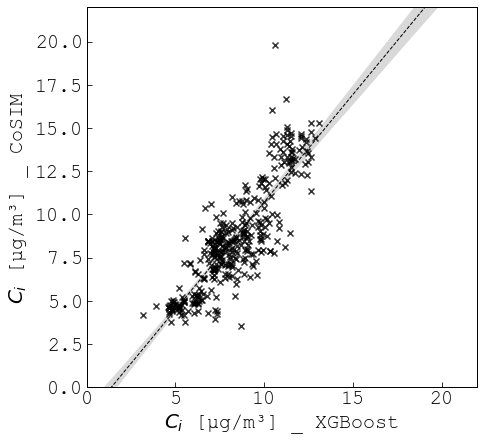

In [20]:
plt.rcParams.update({'font.family':'Courier New'})
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 1
plt.xlim(0,22,1)
plt.ylim(0,22,1)
plt.tick_params( direction="in", length=5)
ax = sb.regplot(x="Predicted_Values", y="True_Values", data=results, ci=95, truncate=False, scatter = True, line_kws={"color":"k","alpha":1,"lw":1, 'ls':'dashed'}, marker='x', color='k')
plt.ylabel('$C_i$ [\u03BCg/m\u00b3] _ CoSIM ', fontname="Courier New")
plt.xlabel('$C_i$ [\u03BCg/m\u00b3] _ XGBoost ', fontname="Courier New")
plt.savefig('02_XGB_Reg_Pre_TRAINING', dpi=150)
from scipy import stats
stats.pearsonr(results['Predicted_Values'], results['True_Values'])

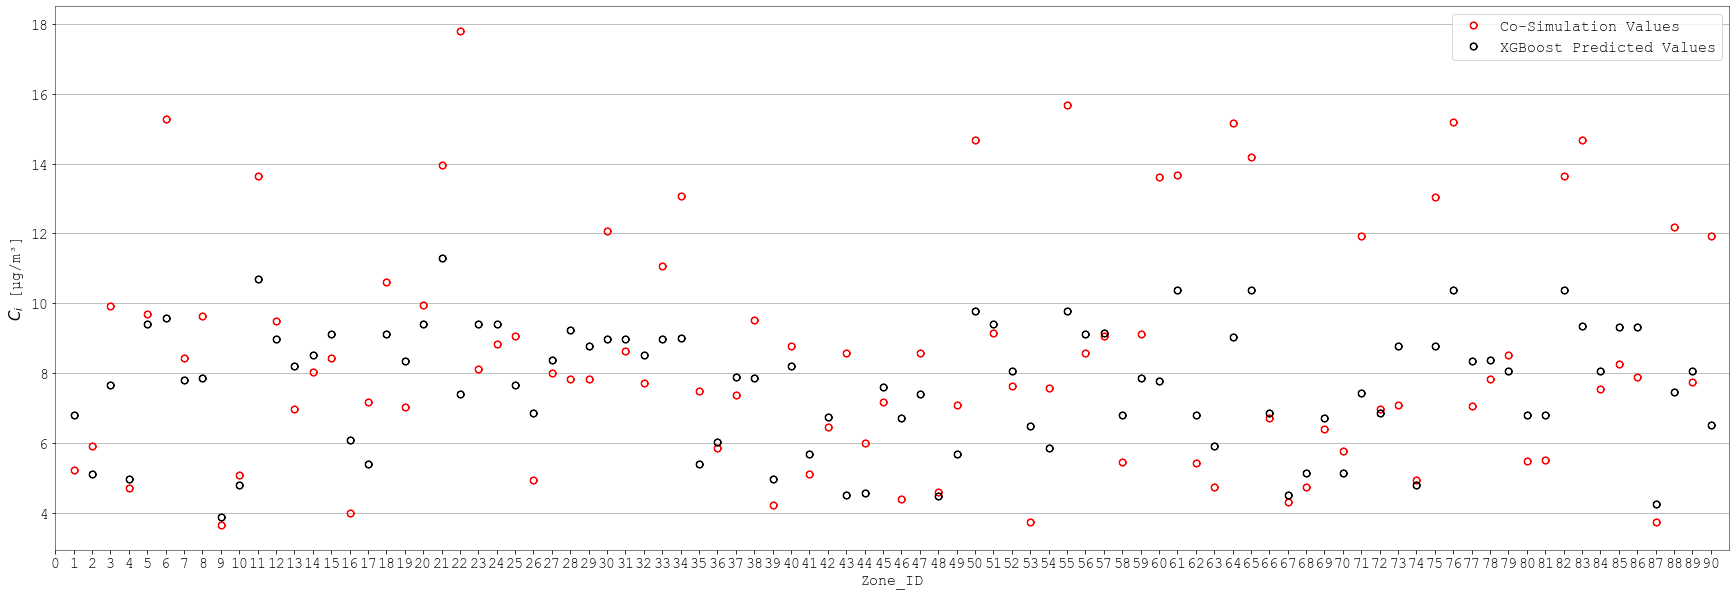

In [22]:
plt.rcParams.update({'font.family':'Courier New'})
plt.rcParams.update({'font.size': 15})
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams['figure.figsize'] = (30, 10)
plt.xlabel('Zone_ID')
plt.rcParams["figure.autolayout"] = True
plt.xlim(1,91,1)
plt.xticks(results['Zone_ID'])
plt.ylabel('$C_i$ [\u03BCg/m\u00b3]')
plt.plot(results['True_Values'], c='r', marker='$\u25EF$', linewidth=0, markersize=7.5)
plt.plot(results['Predicted_Values'], c='k', marker="$\u25EF$", linewidth=0,  markersize=7.5)
plt.gca().legend(('Co-Simulation Values','XGBoost Predicted Values'))
plt.grid(axis='y')

plt.savefig('Feb_XGB_2022_60p_pre', dpi=150)
plt.show()

(0.7109368311002042, 4.149612271703913e-15)

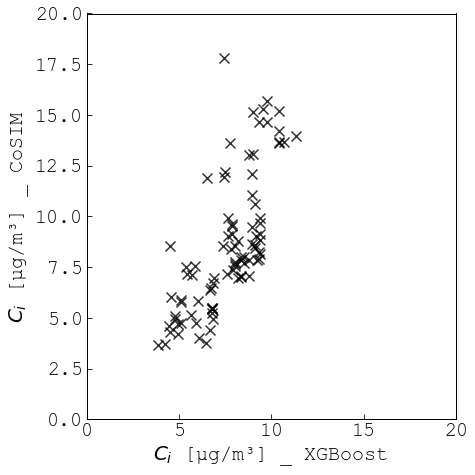

In [24]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 1
plt.tick_params( direction="in", length=5)
plt.scatter(x ='Predicted_Values', y ='True_Values', data = results, marker="x", color='k', s=100, alpha=0.8)
plt.ylabel('$C_i$ [\u03BCg/m\u00b3] _ CoSIM ', fontname="Courier New")
plt.xlabel('$C_i$ [\u03BCg/m\u00b3] _ XGBoost ', fontname="Courier New")
plt.xlim(0,20,1)
plt.ylim(0,20,1)
plt.savefig('Feb_XGB_2022_Pears_60p_pre', dpi=150)
from scipy import stats
stats.pearsonr(results['True_Values'], results['Predicted_Values']) 

C:\Users\arp17tka\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\arp17tka\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


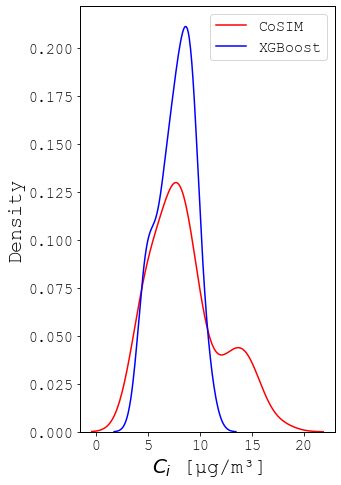

In [25]:
import seaborn as sns
plt.figure(figsize=(5, 7))
plt.rcParams.update({'font.size': 15})

ax = sns.distplot(results['True_Values'], hist=False, color="r", label="CoSIM")
sns.distplot(results['Predicted_Values'], hist=False, color="b", label="January Indoor PM2.5 [\u03BCg/m\u00b3] (RF)" , ax=ax)
plt.ylabel('Density',  fontsize = 20)
plt.xlabel('$C_i$ [\u03BCg/m\u00b3]', fontsize = 20)

plt.gca().legend(('CoSIM','XGBoost'))
plt.savefig('Feb_XGB_2022_Density_60p_pre', dpi=150)
plt.show()
plt.close()

In [21]:
xgbr_random.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 800,
 'max_depth': 100,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.4}

In [22]:
best_random = xgbr_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)

Model Performance:
Average Error: 0.0420 degrees.

RMSE:  0.078
Accuracy = 99.53%.


C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [24]:
# Initializing the XGBR model
model = xgb.XGBRegressor(colsample_bytree = 0.7999999, learning_rate = 0.01, colsample_bylevel =0.4,
                max_depth = 100, n_estimators = 800, subsample = 0.7999999, random_state=42)
# Fitting the Random Forest Regression model to the data
xgbr_tune =model.fit(X_train, y_train)

C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [30]:
from sklearn.utils import shuffle
X_shuffle, y_shuffle = shuffle(X_train, y_train, random_state=42)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbr_tune, X_shuffle, y_shuffle,
                         scoring="neg_mean_squared_error",
                         cv=10, n_jobs=1)
rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 2))
print("RMSE average: ", np.mean(rmse))

C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\arp17tka\AppData\Local\Programs\Python\Python3

RMSE values:  [0.82 1.2  0.92 0.75 0.91 0.92 0.96 0.99 1.52 1.1 ]
RMSE average:  1.0074163374139564


In [25]:
# Predicting the target values of the test set
y_pred_tune = xgbr_tune.predict(X_train)
predictions_tune = pd.DataFrame(y_pred_tune)

In [26]:
# RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error
rmse = float(format(np.sqrt(mean_squared_error(y_train, y_pred_tune)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.078


In [27]:
# Calculate the absolute errors
errors = abs(y_pred_tune - y_train)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.04 degrees.


In [28]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_train - y_pred_tune) / y_train)) * 100))

Accuracy 99.53454348003098


In [29]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, y_pred_tune))

R2 Value: 0.999327479526664


In [30]:
predictions_tune.to_csv(r'G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\02_XGB_Train\02_PredictedData_tune.csv')

In [34]:
results_tuned = pd.read_csv(r"G:\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\02_XGB_Train\03_Results_tune.csv")
results_tuned.set_index('Zone_ID')

,True_Values,Predicted_Values
Zone_ID,,
1,13.326,13.351363
2,8.677,8.693327
3,13.097,13.069376
4,8.393,8.379734
5,12.958,12.759903
...,...,...
353,10.606,10.527571
354,7.690,7.633995
355,5.045,5.048259


(0.9997133598085056, 0.0)

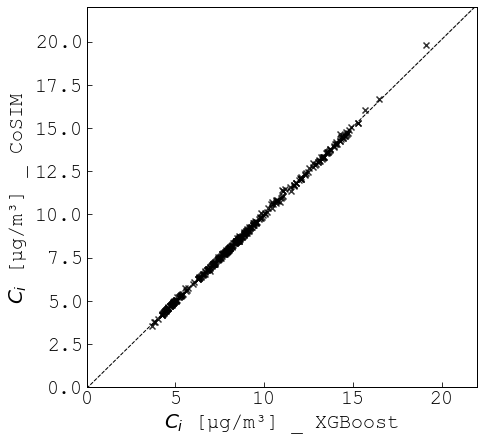

In [35]:
plt.rcParams.update({'font.family':'Courier New'})
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 1
plt.xlim(0,22,1)
plt.ylim(0,22,1)
plt.tick_params( direction="in", length=5)
ax = sb.regplot(x="Predicted_Values", y="True_Values", data=results_tuned, ci=95, truncate=False, scatter = True, line_kws={"color":"k","alpha":1,"lw":1, 'ls':'dashed'}, marker='x', color='k')
plt.ylabel('$C_i$ [\u03BCg/m\u00b3] _ CoSIM ', fontname="Courier New")
plt.xlabel('$C_i$ [\u03BCg/m\u00b3] _ XGBoost ', fontname="Courier New")
plt.savefig('02_XGB_Reg_Post_TRAINING', dpi=150)
from scipy import stats
stats.pearsonr(results_tuned['Predicted_Values'], results_tuned['True_Values'])

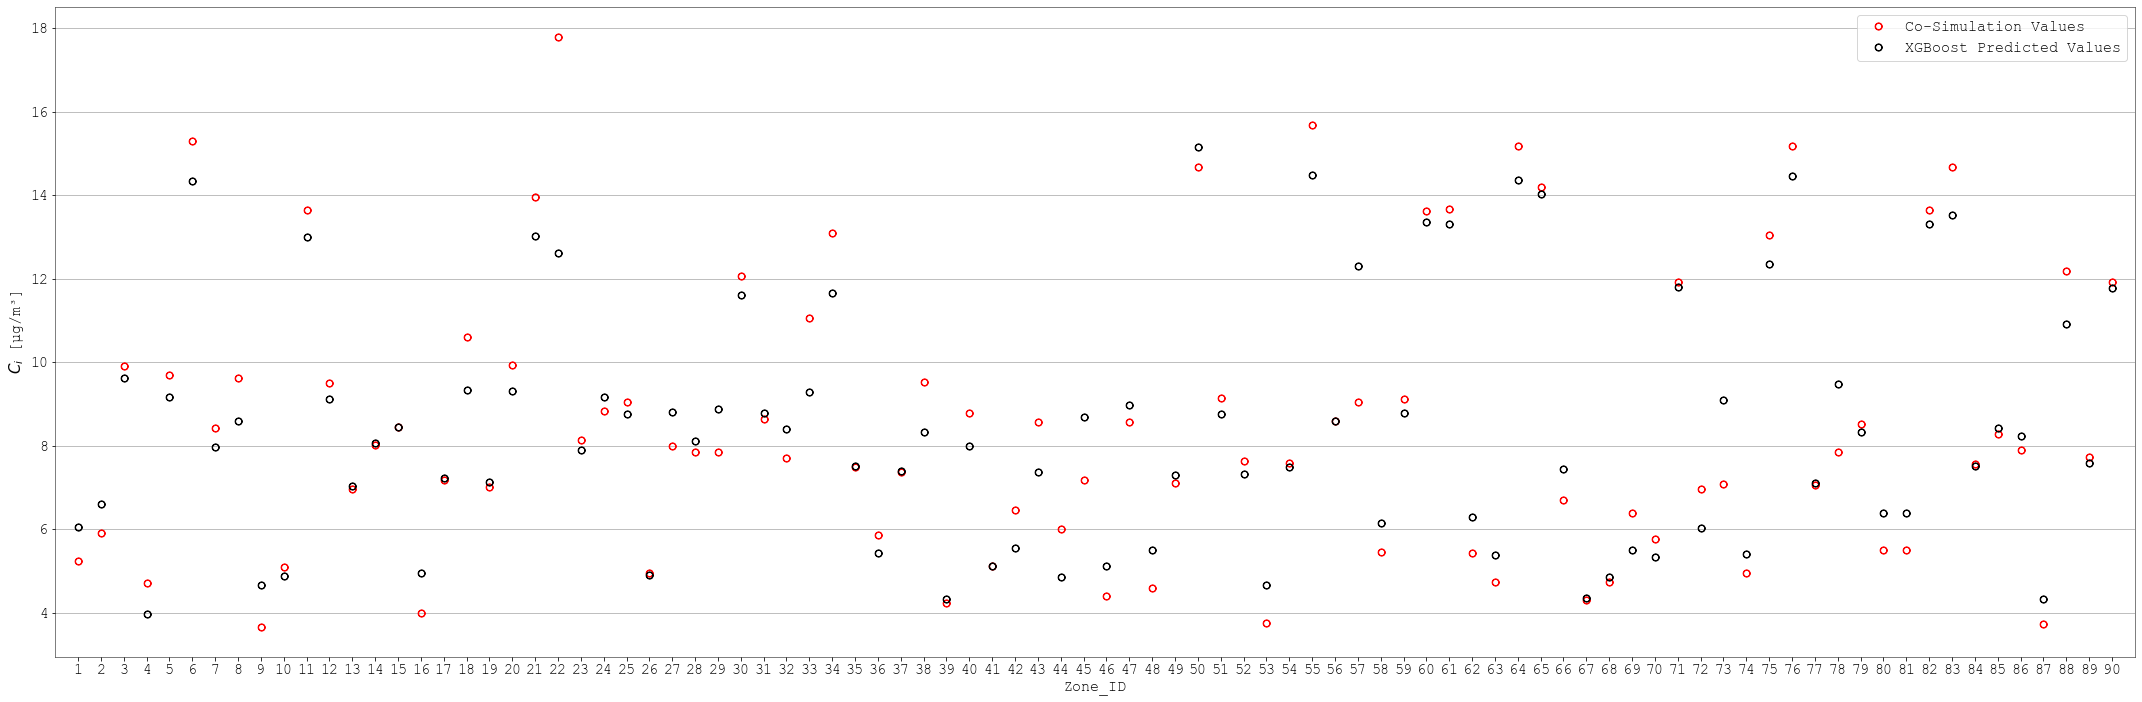

In [40]:
plt.rcParams.update({'font.family':'Courier New'})
plt.rcParams.update({'font.size': 15})
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams['figure.figsize'] = (30, 10)
plt.xlabel('Zone_ID')
plt.rcParams["figure.autolayout"] = True
plt.xlim(0,91,1)
plt.xticks(results['Zone_ID'])
plt.ylabel('$C_i$ [\u03BCg/m\u00b3]')
plt.plot(results_tuned['True_Values'], c='r', marker='$\u25EF$', linewidth=0, markersize=7.5)
plt.plot(results_tuned['Predicted_Values'], c='k', marker="$\u25EF$", linewidth=0,  markersize=7.5)
plt.gca().legend(('Co-Simulation Values','XGBoost Predicted Values'))
plt.grid(axis='y')

plt.savefig('Feb_XGB_2022_60p_tuned_model', dpi=150)
plt.show()

(0.9596372456903387, 2.9162816479613072e-50)

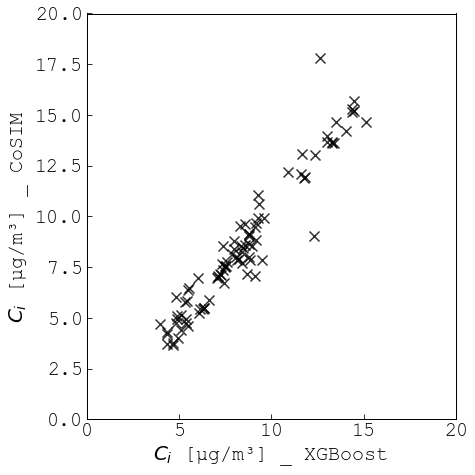

In [43]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 1
plt.tick_params( direction="in", length=5)
plt.scatter(x ='Predicted_Values', y ='True_Values', data = results_tuned, marker="x", color='k', s=100, alpha=0.8)
plt.ylabel('$C_i$ [\u03BCg/m\u00b3] _ CoSIM ', fontname="Courier New")
plt.xlabel('$C_i$ [\u03BCg/m\u00b3] _ XGBoost ', fontname="Courier New")
plt.xlim(0,20,1)
plt.ylim(0,20,1)
plt.savefig('Feb_XGB_2022_Pears_60p_tuned_model', dpi=150)
from scipy import stats
stats.pearsonr(results_tuned['True_Values'], results_tuned['Predicted_Values']) 

C:\Users\arp17tka\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\arp17tka\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


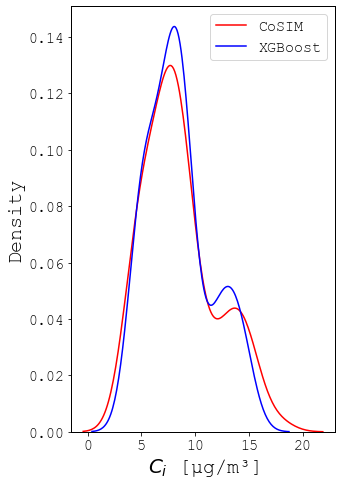

In [44]:
import seaborn as sns
plt.figure(figsize=(5, 7))
plt.rcParams.update({'font.size': 15})

ax = sns.distplot(results_tuned['True_Values'], hist=False, color="r", label="CoSIM")
sns.distplot(results_tuned['Predicted_Values'], hist=False, color="b", label="January Indoor PM2.5 [\u03BCg/m\u00b3] (RF)" , ax=ax)
plt.ylabel('Density',  fontsize = 20)
plt.xlabel('$C_i$ [\u03BCg/m\u00b3]', fontsize = 20)

plt.gca().legend(('CoSIM','XGBoost'))
plt.savefig('Feb_XGB_2022_Density_60p_tuned_model', dpi=150)
plt.show()
plt.close()

In [49]:
#Saving feature names for later use
feature_list = list(X.columns)

In [17]:
import shap
X100 = shap.utils.sample(X_test, 100) # 100 instances for use as the background distribution
#explain the XGBR model with SHAP
explainer_xgbr = shap.Explainer(xgbr_tune.predict, X100)
shap_values_xgbr = explainer_xgbr(X_test)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
Exact explainer: 91it [00:12,  1.73it/s]                                                                               


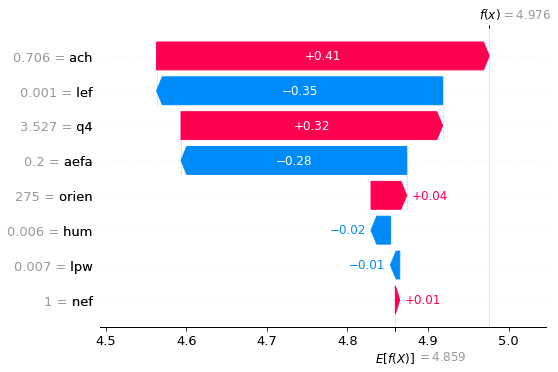

In [58]:
sample_ind =18
shap.plots.waterfall(shap_values_xgbr[sample_ind], max_display=10)

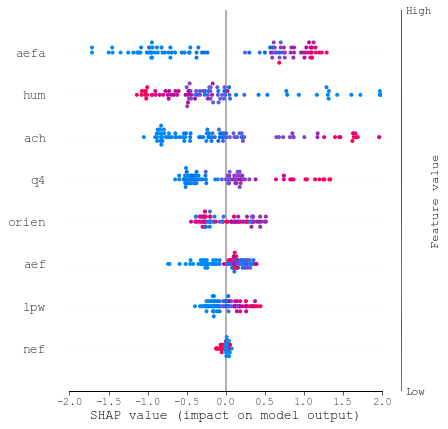

In [23]:
plt.rcParams.update({'font.family':'Courier New'})
plt.rcParams.update({'font.size': 20})

plt.rcParams["axes.edgecolor"] = "black"

plt.rcParams["axes.linewidth"] = 1
shap.plots.beeswarm(shap_values_xgbr, max_display=8, order=shap_values_xgbr.abs.mean(0), plot_size=(7,7),show=False)
plt.xlim(-2,2,0.5)
plt.gcf().axes[-1].set_aspect(500)
plt.gcf().axes[-1].set_box_aspect(500)
plt.savefig('02_XGB_2022_SHAP_60p', dpi=150)

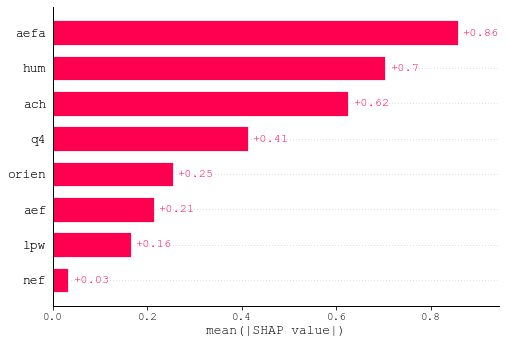

In [21]:
shap.plots.bar(shap_values_xgbr)

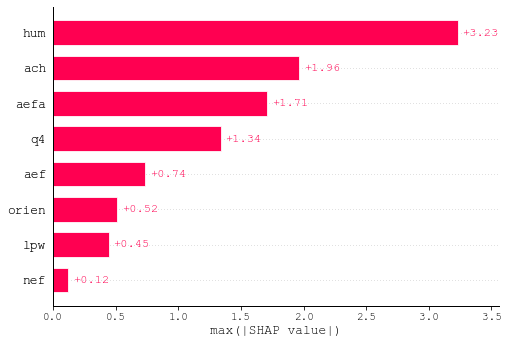

In [22]:
shap.plots.bar(shap_values_xgbr.abs.max(0))

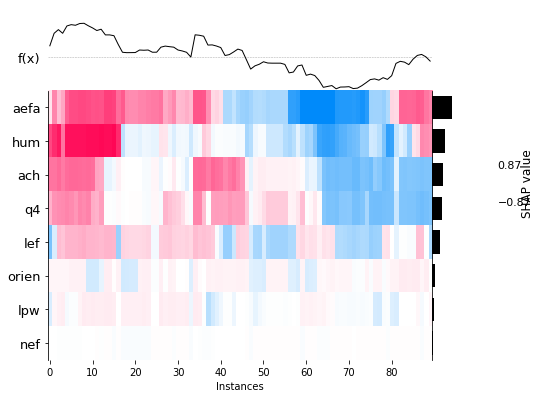

In [62]:
shap.plots.heatmap(shap_values_xgbr)

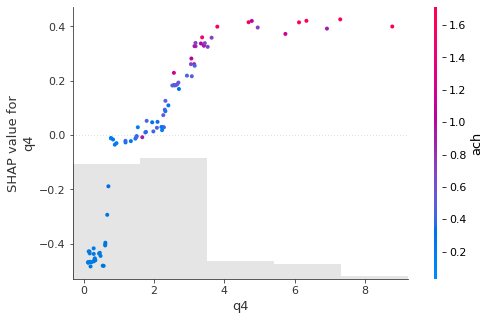

In [65]:
shap.plots.scatter(shap_values_xgbr[:,"q4"], color=shap_values_xgbr[:,'ach'])

In [67]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df


,Actual,Predicted
id,,
RC1_F2_O_O02,4.289,4.353189
RC2_F1_O_O12,4.332,4.851928
AT_F14_O_O08,5.780,5.241977
RC2_F1_O_O23,2.345,2.325893
AT_F10_O_O04,5.307,4.982434
...,...,...
RC2_F3_O_O04,5.600,5.619963
RC2_F1_O_O18,3.463,3.566565
AT_F1_O_O04,7.173,7.078015


In [68]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4429004074308608
Mean Squared Error: 0.35482170138396996
Root Mean Squared Error: 0.5956691207238881


In [69]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')


Mean Absolute Error: 0.44 degrees.
Accuracy: 90.104 %.


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


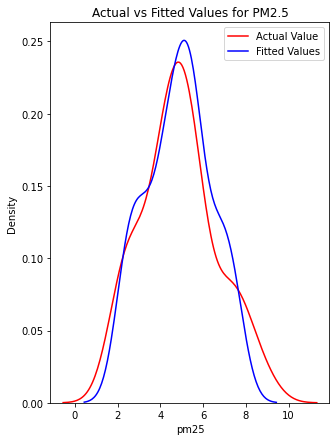

In [70]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for PM2.5')

plt.legend()
plt.show()
plt.close()

(0.9432710076889425, 6.548230784393994e-44)

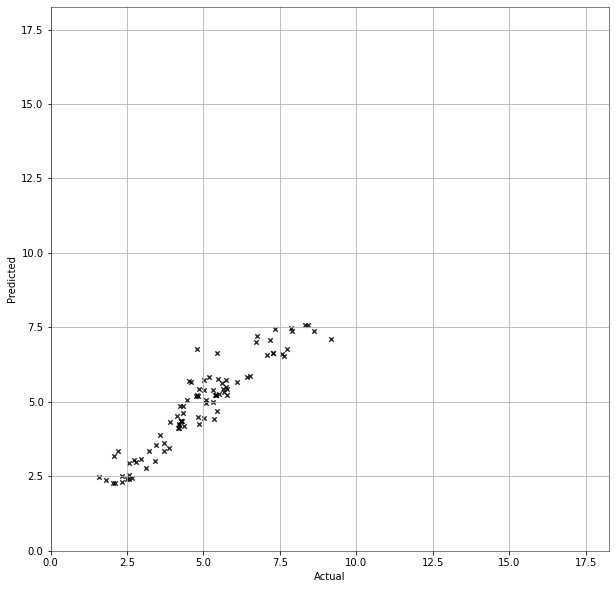

In [71]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.scatter(x ='Actual', y ='Predicted', data = df, marker='x', color='k', s=20, alpha=0.8)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.grid()
plt.xlim(0,18.25)
plt.ylim(0,18.25)
from scipy import stats
stats.pearsonr(df['Actual'], df['Predicted'])

In [72]:
from yellowbrick.regressor import ResidualsPlot

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


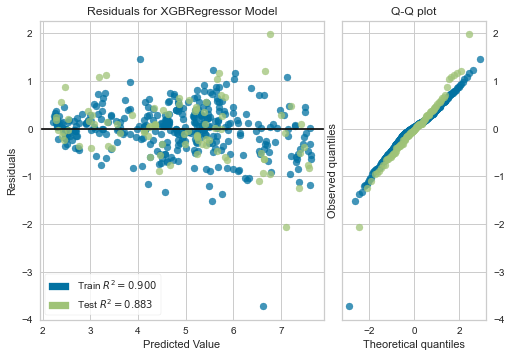

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [73]:
visualizer = ResidualsPlot(xgbr, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


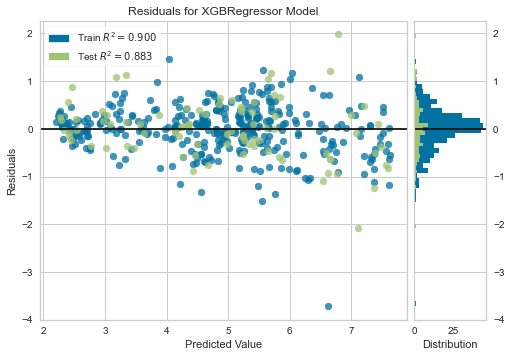

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [74]:
visualizer = ResidualsPlot(xgbr) 
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

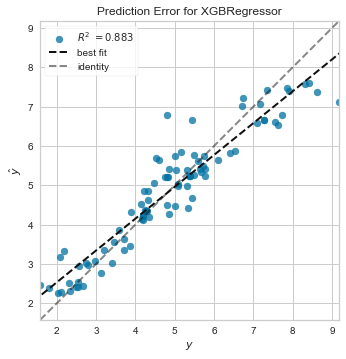

In [76]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(xgbr) 
# fit visualizer on training data
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
#show the plot and save in given path
visualizer.show("prediction_error.jpg")

<AxesSubplot:title={'center':'Feature Importances of 8 Features using XGBRegressor'}, xlabel='feature importance'>

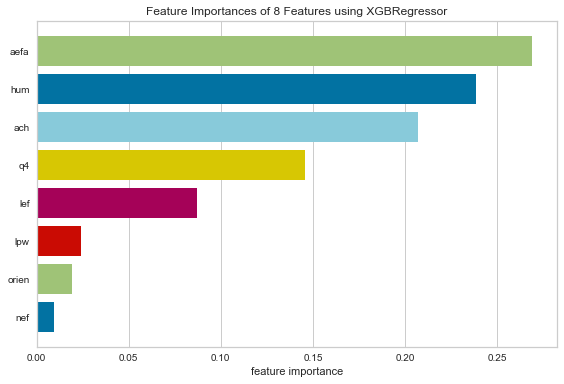

In [77]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(xgbr,relative=False)
#fit on train dataset
viz.fit(X_train, y_train)
#show plot and save at output path
viz.show("feature_importance.jpg")

In [78]:
ic = pd.read_csv(r"C:\users\arp17tka\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220621_All_Data\04_ICoSS\CSV\2022_IC_Jan.csv")
ic.dropna(inplace=True) # Drop null values
ic.columns = ic.columns.map(lambda row: "_".join(row.lower().split(" "))) # Replace space with "_"
ic.set_index('id', inplace=True)
ic.head()

,zonetype,area,vol,level,h,orien,nef,aef,lef,naz,...,aefv,aefa,tin,dt,hum,ach,pm25,io,f,q4
id,,,,,,,,,,,,,,,,,,,,,
IC_F0_O_M01,Meeting Room,88.25,317.7,0,3.6,320,2,113.4,0.02421,3,...,0.35694,1.28499,16.146485,11.619502,0.006777,1.316417,7.276081,0.694946,418.225536,3.688056
IC_F0_O_O01,Shared Cellular Office,21.00,75.6,0,3.6,95,1,25.2,0.00538,3,...,0.33333,1.20000,17.607549,13.080567,0.005550,0.363247,6.543776,0.625002,27.461461,1.089741
IC_F1_EF_LB01,Lab,117.00,421.2,1,3.6,50,2,133.2,0.02844,4,...,0.31624,1.13846,14.752151,10.225169,0.005028,1.077834,6.883133,0.657415,453.983757,3.408286
IC_F1_EF_SR01,Seminar Room,84.00,302.4,1,3.6,320,2,93.6,0.01998,1,...,0.30952,1.11429,13.901918,9.374936,0.004896,1.171455,7.245109,0.691987,354.247869,3.784699
IC_F1_O_M01,Meeting Room,36.00,129.6,1,3.6,320,2,50.4,0.01076,1,...,0.38889,1.40000,14.861747,10.334765,0.005930,1.892284,8.165725,0.779916,245.240068,4.865874


In [79]:
ic1 = ic[['orien', 'nef', 'lef', 'aefa', 'lpw', 'q4', 'ach', 'hum']]
target_ic1 = pd.Series(ic.pm25)
ic1.head()

,orien,nef,lef,aefa,lpw,q4,ach,hum
id,,,,,,,,
IC_F0_O_M01,320,2,0.02421,1.28499,0.00730,3.688056,1.316417,0.006777
IC_F0_O_O01,95,1,0.00538,1.20000,0.00999,1.089741,0.363247,0.005550
IC_F1_EF_LB01,50,2,0.02844,1.13846,0.00999,3.408286,1.077834,0.005028
IC_F1_EF_SR01,320,2,0.01998,1.11429,0.00922,3.784699,1.171455,0.004896
IC_F1_O_M01,320,2,0.01076,1.40000,0.00845,4.865874,1.892284,0.005930


In [80]:
ic2=xgbr.predict(ic1)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [81]:
ic2 

array([6.2186584, 5.542482 , 7.232561 , 7.4485183, 6.4865847, 7.1070676,
       5.3772864, 5.3751035, 5.5201845, 6.228937 , 6.6326604, 5.2195024,
       5.2349977, 5.3879933, 6.032121 , 6.458817 , 5.0683184, 5.120128 ,
       5.2457275, 6.034274 ], dtype=float32)

In [82]:
comp=pd.DataFrame({'Actual':target_ic1, 'Predicted':ic2})
comp

,Actual,Predicted
id,,
IC_F0_O_M01,7.276081,6.218658
IC_F0_O_O01,6.543776,5.542482
IC_F1_EF_LB01,6.883133,7.232561
IC_F1_EF_SR01,7.245109,7.448518
IC_F1_O_M01,8.165725,6.486585
IC_F2_EF_LB01,6.770934,7.107068
IC_F2_EF_LB02,5.078515,5.377286
IC_F2_EF_LB03,4.564356,5.375103
IC_F2_EF_LB04,4.964638,5.520185


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


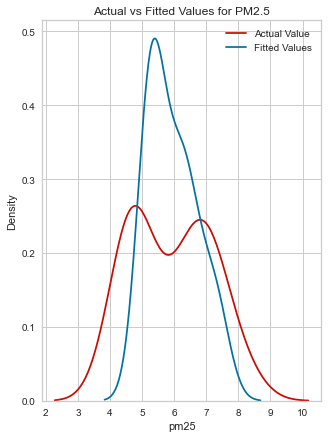

In [83]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(target_ic1, hist=False, color="r", label="Actual Value")
sns.distplot(ic2, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for PM2.5')
plt.legend()

plt.show()
plt.close()

In [84]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((target_ic1 - ic2) / target_ic1)) * 100))

Accuracy 88.36126089034627


In [85]:
# Calculate the absolute errors
errors = abs(ic2 - target_ic1)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.68 degrees.


In [86]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(target_ic1, ic2)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.771


(0.7831302115470065, 4.446770995826286e-05)

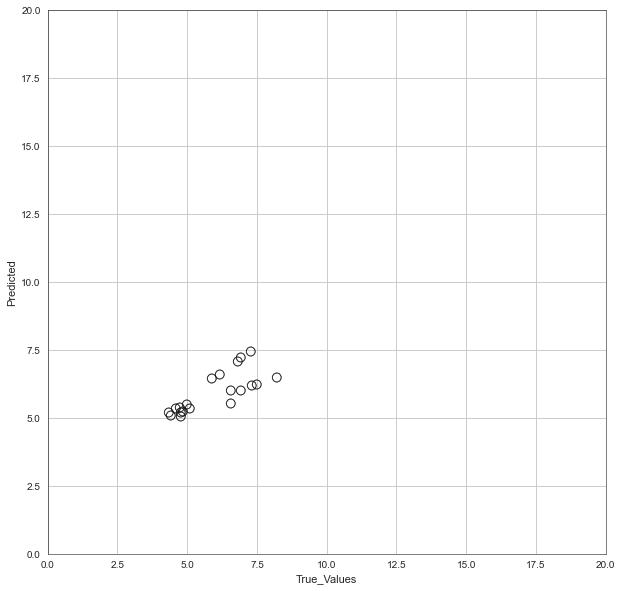

In [87]:

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.scatter(x ='Actual', y ='Predicted', data = comp, marker="$\u25EF$", color='k', s=100, alpha=1)
plt.ylabel('Predicted')
plt.xlabel('True_Values')
plt.xlim(0,20,0.5)
plt.ylim(0,20,0.5)
from scipy import stats
stats.pearsonr(comp['Actual'], comp['Predicted'])

# XGBoost

In [63]:
import xgboost as xgb
xgbr = xgb.XGBRegressor()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbr, X_shuffle, y_shuffle,
                         scoring="neg_mean_squared_error",
                         cv=5, n_jobs=1)
rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 2))
print("RMSE average: ", np.mean(rmse))

C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\arp17tka\AppData\Local\Programs\Python\Python3

RMSE values:  [0.62 0.47 0.45 0.71 0.5 ]
RMSE average:  0.5486687426670637


C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [154]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X1, y1)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fitting 5 folds for each of 25 candidates, totalling 125 fits


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

Best parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.6702488185613508


In [156]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.799999, learning_rate = 0.1,
                max_depth = 6, alpha = 10, n_estimators = 500, subsample = 0.5)

In [157]:
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

[12:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [158]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error # for calculating the cost function

In [159]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.598479


In [160]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.44 degrees.


In [161]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, xg_reg.predict(X_train)))

R2 Value: 0.9116239629518208


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [169]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Accuracy 90.51121137801064


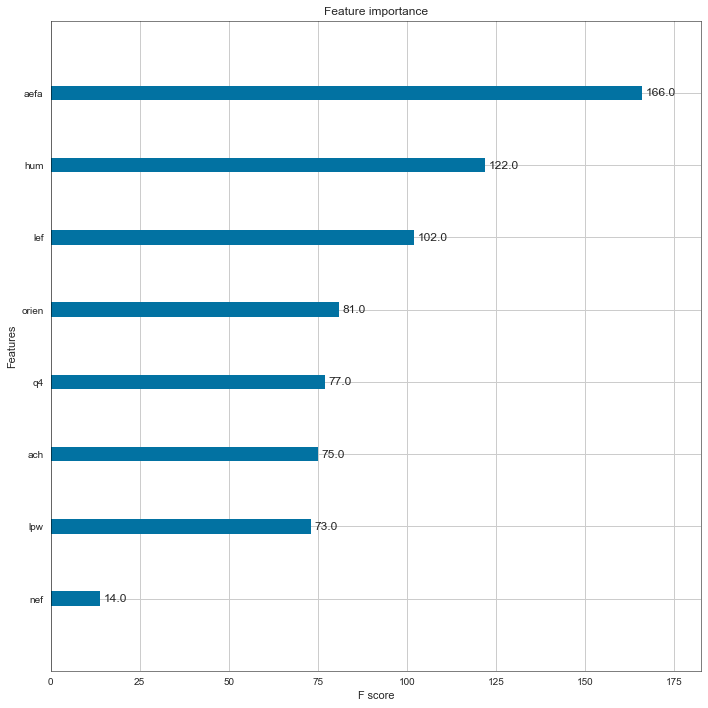

In [164]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [170]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
id,,
RC1_F2_O_O02,4.289,4.226048
RC2_F1_O_O12,4.332,4.723532
AT_F14_O_O08,5.780,5.189242
RC2_F1_O_O23,2.345,2.338201
AT_F10_O_O04,5.307,4.915299
...,...,...
AT_F15_EF_ST03,6.398,5.013599
BH_F0_O_M01,7.349,6.175993
301_F0_EF_LR02,8.176,7.689831


In [171]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')


Mean Absolute Error: 0.44 degrees.
Accuracy: 90.511 %.


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


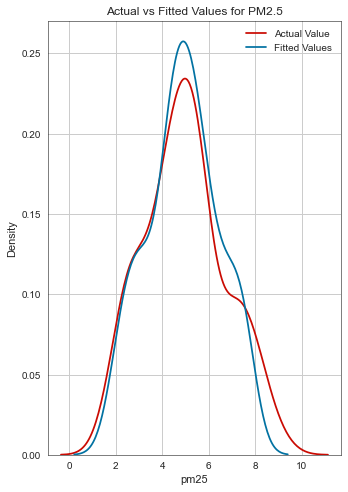

In [172]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for PM2.5')
plt.legend()

plt.show()
plt.close()

(0.9405337825250741, 3.1705973263859e-64)

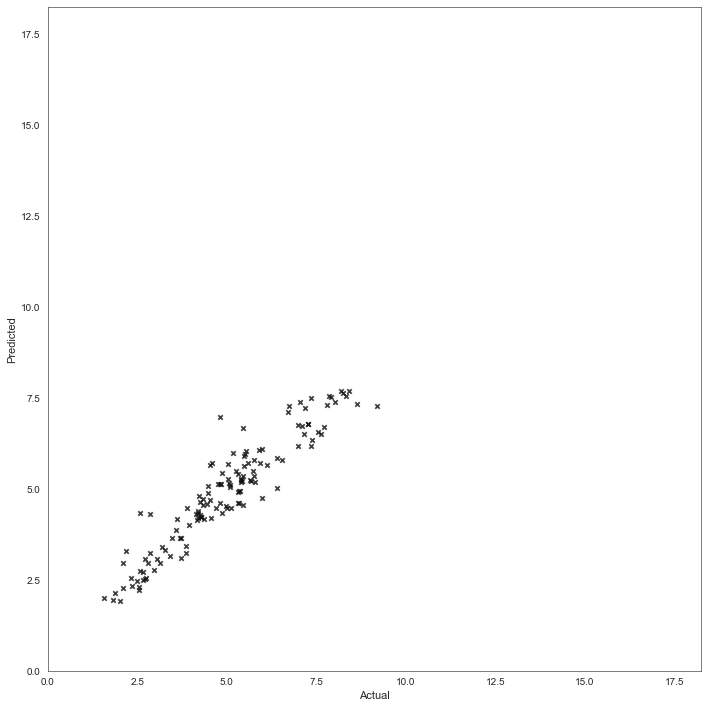

In [173]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.scatter(x ='Actual', y ='Predicted', data = df, marker='x', color='k', s=20, alpha=0.8)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.grid()
plt.xlim(0,18.25)
plt.ylim(0,18.25)
from scipy import stats
stats.pearsonr(df['Actual'], df['Predicted'])

In [175]:
import shap
X100 = shap.utils.sample(X_test, 100) # 100 instances for use as the background distribution
#explain the XGB model with SHAP
explainer_XGB = shap.Explainer(xg_reg.predict, X100)
shap_values_XGB = explainer_XGB(X_test)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


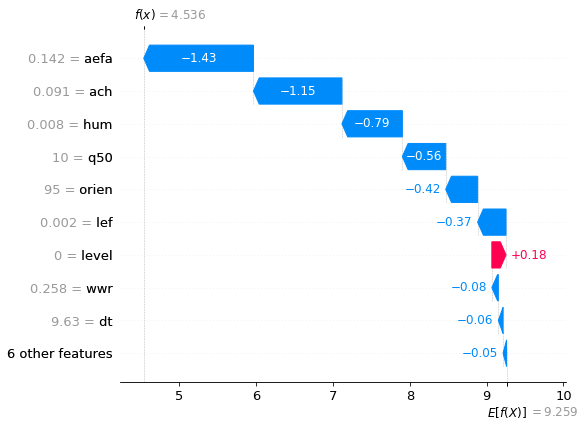

In [22]:
sample_ind =18
shap.plots.waterfall(shap_values_XGB[sample_ind], max_display=10)

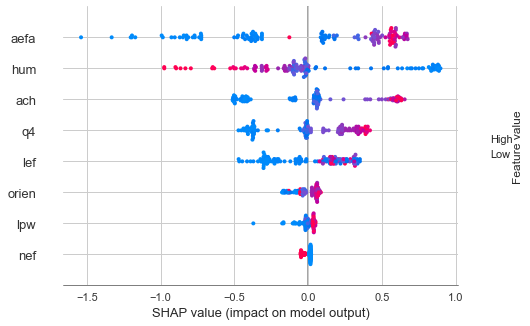

In [176]:
shap.plots.beeswarm(shap_values_XGB, max_display=15)

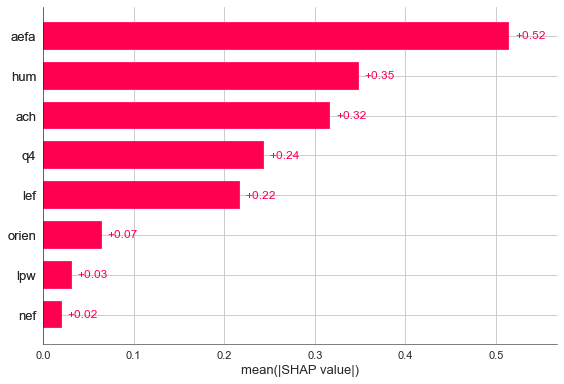

In [177]:
shap.plots.bar(shap_values_XGB)

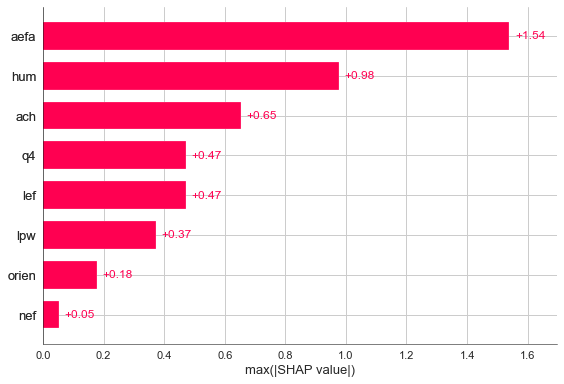

In [178]:
shap.plots.bar(shap_values_XGB.abs.max(0))

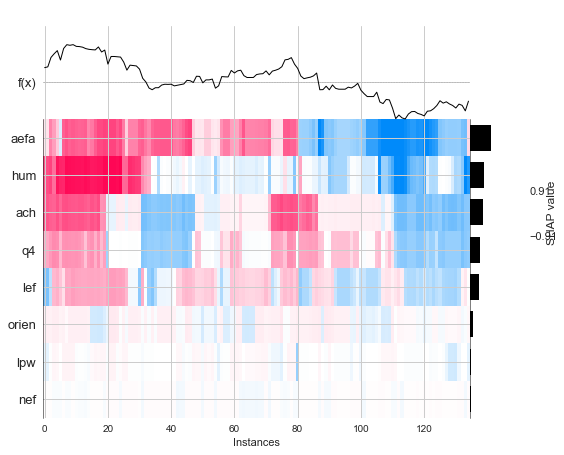

In [179]:
shap.plots.heatmap(shap_values_XGB)

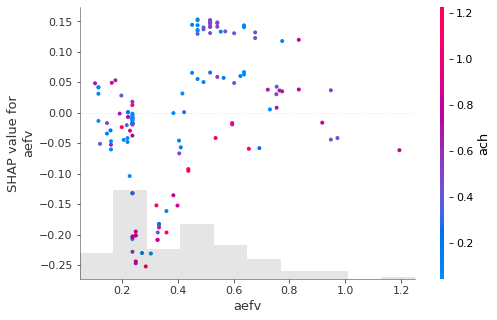

In [27]:
shap.plots.scatter(shap_values_XGB[:,"aefv"], color=shap_values_XGB[:,'ach'])

In [28]:
from yellowbrick.regressor import ResidualsPlot

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


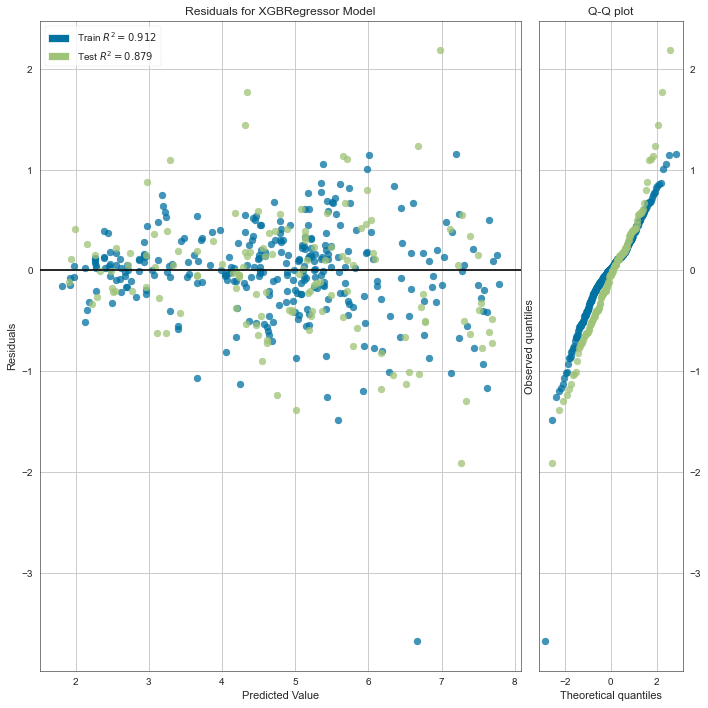

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [180]:
visualizer = ResidualsPlot(xg_reg, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


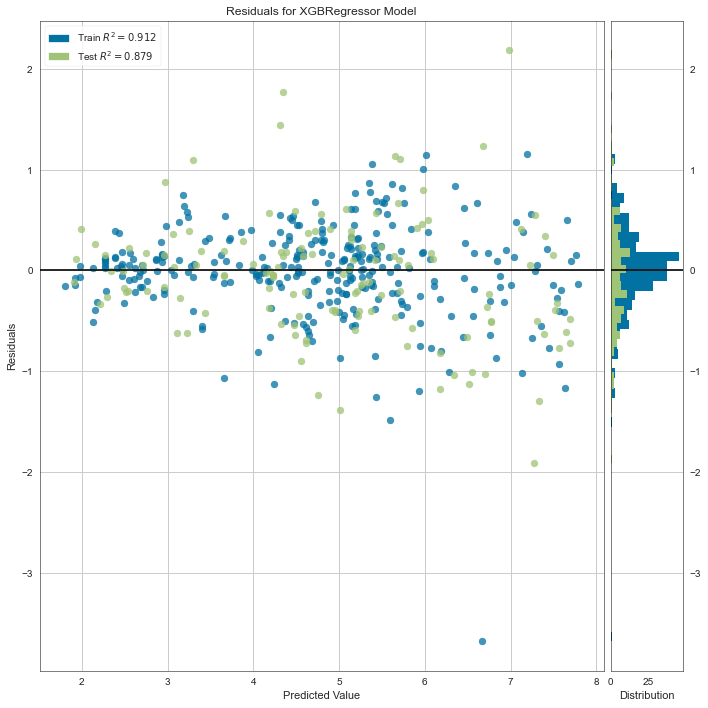

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [181]:
visualizer = ResidualsPlot(xg_reg) 
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

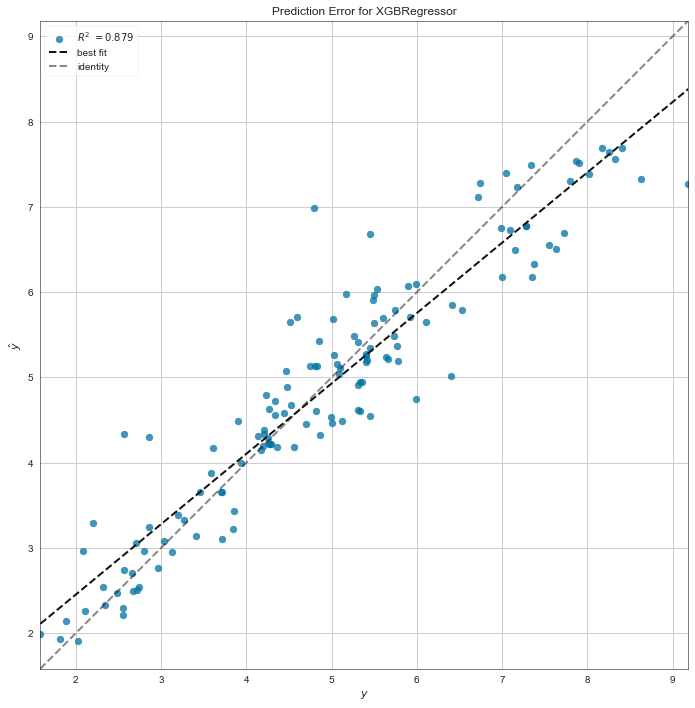

In [182]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(xg_reg) 
# fit visualizer on training data
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
#show the plot and save in given path
visualizer.show("prediction_error.jpg")

<AxesSubplot:title={'center':'Feature Importances of 8 Features using XGBRegressor'}, xlabel='feature importance'>

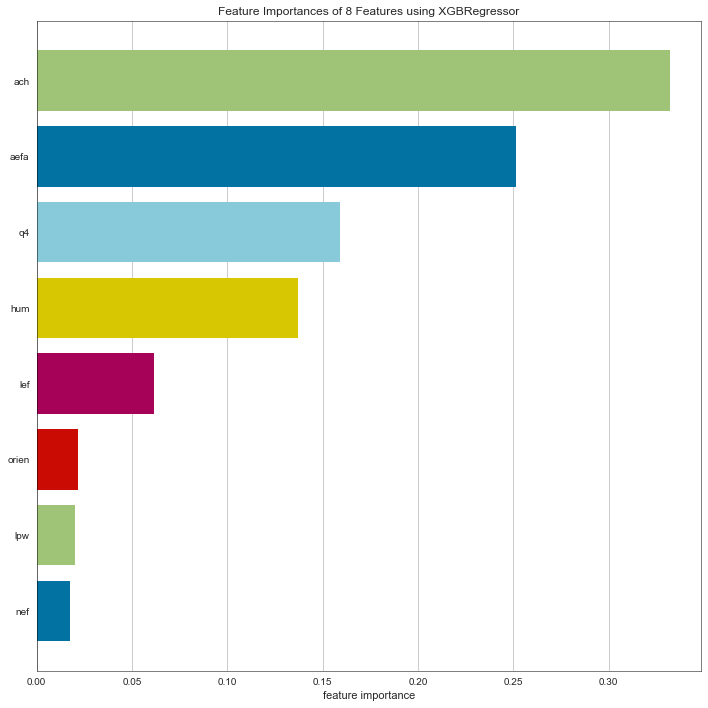

In [183]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(xg_reg,relative=False)
#fit on train dataset
viz.fit(X_train, y_train)
#show plot and save at output path
viz.show("feature_importance.jpg")

In [185]:
ic2=xg_reg.predict(ic1)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [186]:
ic2

array([6.218599 , 5.5454383, 7.3570623, 7.5585995, 6.4567533, 7.2340307,
       5.3357606, 5.3172317, 5.3836293, 6.1326814, 6.6243067, 5.2211356,
       5.206004 , 5.2660203, 6.0914493, 6.4475126, 4.8713284, 5.1810994,
       5.1377606, 6.025383 ], dtype=float32)

In [187]:
comp=pd.DataFrame({'Actual':target_ic1, 'Predicted':ic2})
comp

,Actual,Predicted
id,,
IC_F0_O_M01,7.276081,6.218599
IC_F0_O_O01,6.543776,5.545438
IC_F1_EF_LB01,6.883133,7.357062
IC_F1_EF_SR01,7.245109,7.558599
IC_F1_O_M01,8.165725,6.456753
IC_F2_EF_LB01,6.770934,7.234031
IC_F2_EF_LB02,5.078515,5.335761
IC_F2_EF_LB03,4.564356,5.317232
IC_F2_EF_LB04,4.964638,5.383629


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


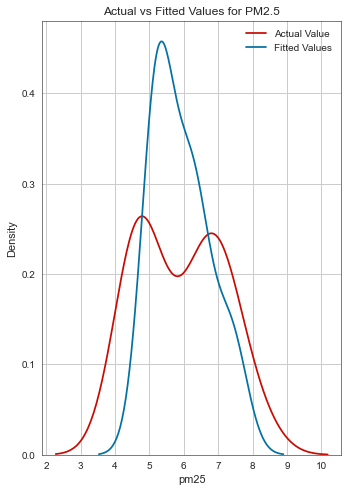

In [188]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(target_ic1, hist=False, color="r", label="Actual Value")
sns.distplot(ic2, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for PM2.5')
plt.legend()

plt.show()
plt.close()

In [189]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((target_ic1 - ic2) / target_ic1)) * 100))

Accuracy 88.72702979340309


In [190]:
# Calculate the absolute errors
errors = abs(ic2 - target_ic1)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.67 degrees.


In [191]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(target_ic1, ic2)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.77


(0.7726247569620932, 6.529199319450812e-05)

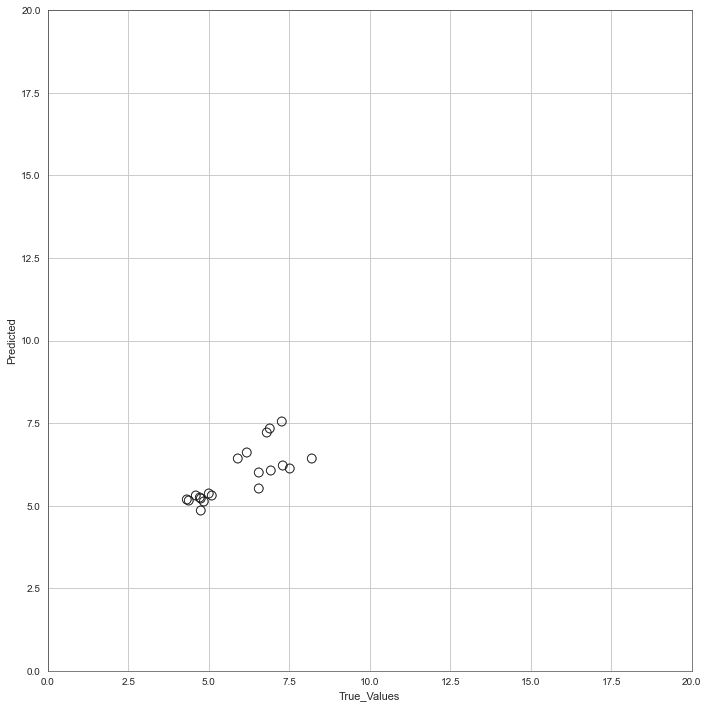

In [192]:

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.scatter(x ='Actual', y ='Predicted', data = comp, marker="$\u25EF$", color='k', s=100, alpha=1)
plt.ylabel('Predicted')
plt.xlabel('True_Values')
plt.xlim(0,20,0.5)
plt.ylim(0,20,0.5)
from scipy import stats
stats.pearsonr(comp['Actual'], comp['Predicted'])